In [4]:
import pandas as pd

df = pd.read_csv('/content/Housing.csv')
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
#drop the null values
df = df.dropna()
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [6]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


understand the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


To find the categorical Values

In [9]:
d = {}
for col in df:
  d[col] = df[col].unique()
d

{'price': array([13300000, 12250000, 12215000, 11410000, 10850000, 10150000,
         9870000,  9800000,  9681000,  9310000,  9240000,  9100000,
         8960000,  8890000,  8855000,  8750000,  8680000,  8645000,
         8575000,  8540000,  8463000,  8400000,  8295000,  8190000,
         8120000,  8080940,  8043000,  7980000,  7962500,  7910000,
         7875000,  7840000,  7700000,  7560000,  7525000,  7490000,
         7455000,  7420000,  7350000,  7343000,  7245000,  7210000,
         7140000,  7070000,  7035000,  7000000,  6930000,  6895000,
         6860000,  6790000,  6755000,  6720000,  6685000,  6650000,
         6629000,  6615000,  6580000,  6510000,  6475000,  6440000,
         6419000,  6405000,  6300000,  6293000,  6265000,  6230000,
         6195000,  6160000,  6125000,  6107500,  6090000,  6083000,
         6020000,  5950000,  5943000,  5880000,  5873000,  5866000,
         5810000,  5803000,  5775000,  5740000,  5652500,  5600000,
         5565000,  5530000,  5523000,  

categorical values to dummies


In [10]:
categorical_cols = ['parking','mainroad', 'guestroom', 'basement', 'hotwaterheating','bedrooms','bathrooms','stories', 'airconditioning', 'prefarea','furnishingstatus']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)
df.head()


,price,area,parking_1,parking_2,parking_3,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,bedrooms_2,...,bathrooms_2,bathrooms_3,bathrooms_4,stories_2,stories_3,stories_4,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,0,1,0,1,0,0,0,0,...,1,0,0,0,1,0,1,1,0,0
1,12250000,8960,0,0,1,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
2,12250000,9960,0,1,0,1,0,1,0,0,...,1,0,0,1,0,0,0,1,1,0
3,12215000,7500,0,0,1,1,0,1,0,0,...,1,0,0,1,0,0,1,1,0,0
4,11410000,7420,0,1,0,1,1,1,0,0,...,0,0,0,1,0,0,1,0,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   parking_1                        545 non-null    int64
 3   parking_2                        545 non-null    int64
 4   parking_3                        545 non-null    int64
 5   mainroad_yes                     545 non-null    int64
 6   guestroom_yes                    545 non-null    int64
 7   basement_yes                     545 non-null    int64
 8   hotwaterheating_yes              545 non-null    int64
 9   bedrooms_2                       545 non-null    int64
 10  bedrooms_3                       545 non-null    int64
 11  bedrooms_4                       545 non-null    int64
 12  bedrooms_5                       545 non-null    i

In [12]:
df.head()

,price,area,parking_1,parking_2,parking_3,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,bedrooms_2,...,bathrooms_2,bathrooms_3,bathrooms_4,stories_2,stories_3,stories_4,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,0,1,0,1,0,0,0,0,...,1,0,0,0,1,0,1,1,0,0
1,12250000,8960,0,0,1,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
2,12250000,9960,0,1,0,1,0,1,0,0,...,1,0,0,1,0,0,0,1,1,0
3,12215000,7500,0,0,1,1,0,1,0,0,...,1,0,0,1,0,0,1,1,0,0
4,11410000,7420,0,1,0,1,1,1,0,0,...,0,0,0,1,0,0,1,0,0,0


In [13]:
d ={}
for col in df:
  d[col] = df[col].unique()
d

{'price': array([13300000, 12250000, 12215000, 11410000, 10850000, 10150000,
         9870000,  9800000,  9681000,  9310000,  9240000,  9100000,
         8960000,  8890000,  8855000,  8750000,  8680000,  8645000,
         8575000,  8540000,  8463000,  8400000,  8295000,  8190000,
         8120000,  8080940,  8043000,  7980000,  7962500,  7910000,
         7875000,  7840000,  7700000,  7560000,  7525000,  7490000,
         7455000,  7420000,  7350000,  7343000,  7245000,  7210000,
         7140000,  7070000,  7035000,  7000000,  6930000,  6895000,
         6860000,  6790000,  6755000,  6720000,  6685000,  6650000,
         6629000,  6615000,  6580000,  6510000,  6475000,  6440000,
         6419000,  6405000,  6300000,  6293000,  6265000,  6230000,
         6195000,  6160000,  6125000,  6107500,  6090000,  6083000,
         6020000,  5950000,  5943000,  5880000,  5873000,  5866000,
         5810000,  5803000,  5775000,  5740000,  5652500,  5600000,
         5565000,  5530000,  5523000,  

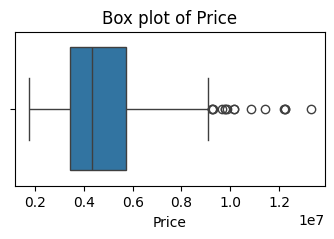

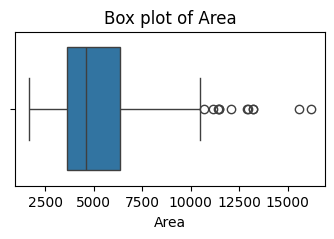

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4,2))
sns.boxplot(x=df['price'])
plt.title('Box plot of Price')
plt.xlabel('Price')
plt.show()

plt.figure(figsize=(4,2))
sns.boxplot(x=df['area'])
plt.title('Box plot of Area')
plt.xlabel('Area')
plt.show()



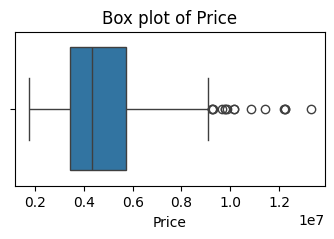

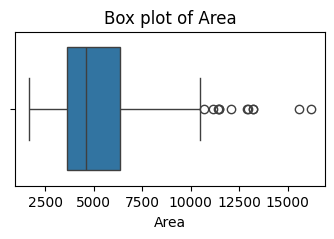

In [15]:
#to remove outliers in box plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4,2))
sns.boxplot(x=df['price'])
plt.title('Box plot of Price')
plt.xlabel('Price')
plt.show()

plt.figure(figsize=(4,2))
sns.boxplot(x=df['area'])
plt.title('Box plot of Area')
plt.xlabel('Area')
plt.show()

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

Feature Scaling(Normalisation)


This code is used to perform feature scaling, specifically a type called min-max normalization (or min-max scaling), on the 'area' column of your DataFrame.

Why Feature Scaling is Important

Algorithm Performance: Many machine learning algorithms perform better when numerical features are on a similar scale. This prevents features with larger ranges from dominating the learning process.

Avoiding Bias: Without scaling, algorithms that rely on distance calculations (like k-nearest neighbors or support vector machines) can be biased towards features with larger values.

Improved Convergence: Scaling can help gradient-based optimization algorithms converge faster.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['area']])
df['area_normalized'] = scaler.transform(df[['area']])
df.head()

,price,area,parking_1,parking_2,parking_3,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,bedrooms_2,...,bathrooms_3,bathrooms_4,stories_2,stories_3,stories_4,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,area_normalized
0,13300000,7420,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0.396564
1,12250000,8960,0,0,1,1,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0.502405
2,12250000,9960,0,1,0,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0.571134
3,12215000,7500,0,0,1,1,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0.402062
4,11410000,7420,0,1,0,1,1,1,0,0,...,0,0,1,0,0,1,0,0,0,0.396564


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 526 entries, 19 to 544
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            526 non-null    int64  
 1   area                             526 non-null    int64  
 2   parking_1                        526 non-null    int64  
 3   parking_2                        526 non-null    int64  
 4   parking_3                        526 non-null    int64  
 5   mainroad_yes                     526 non-null    int64  
 6   guestroom_yes                    526 non-null    int64  
 7   basement_yes                     526 non-null    int64  
 8   hotwaterheating_yes              526 non-null    int64  
 9   bedrooms_2                       526 non-null    int64  
 10  bedrooms_3                       526 non-null    int64  
 11  bedrooms_4                       526 non-null    int64  
 12  bedrooms_5                

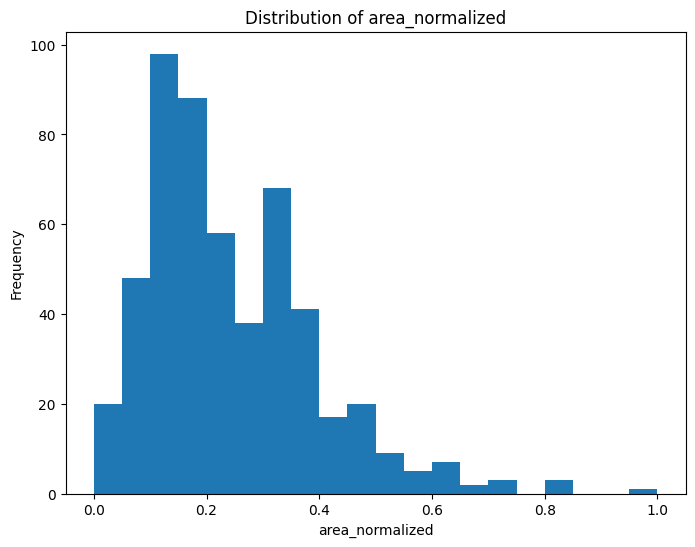

count    526.000000
mean       0.243810
std        0.148840
min        0.000000
25%        0.134409
50%        0.204301
75%        0.332509
max        1.000000
Name: area_normalized, dtype: float64


In [ ]:
continuous_cols = ['area_normalized']

for column in continuous_cols:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=20)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

    print(df[column].describe())


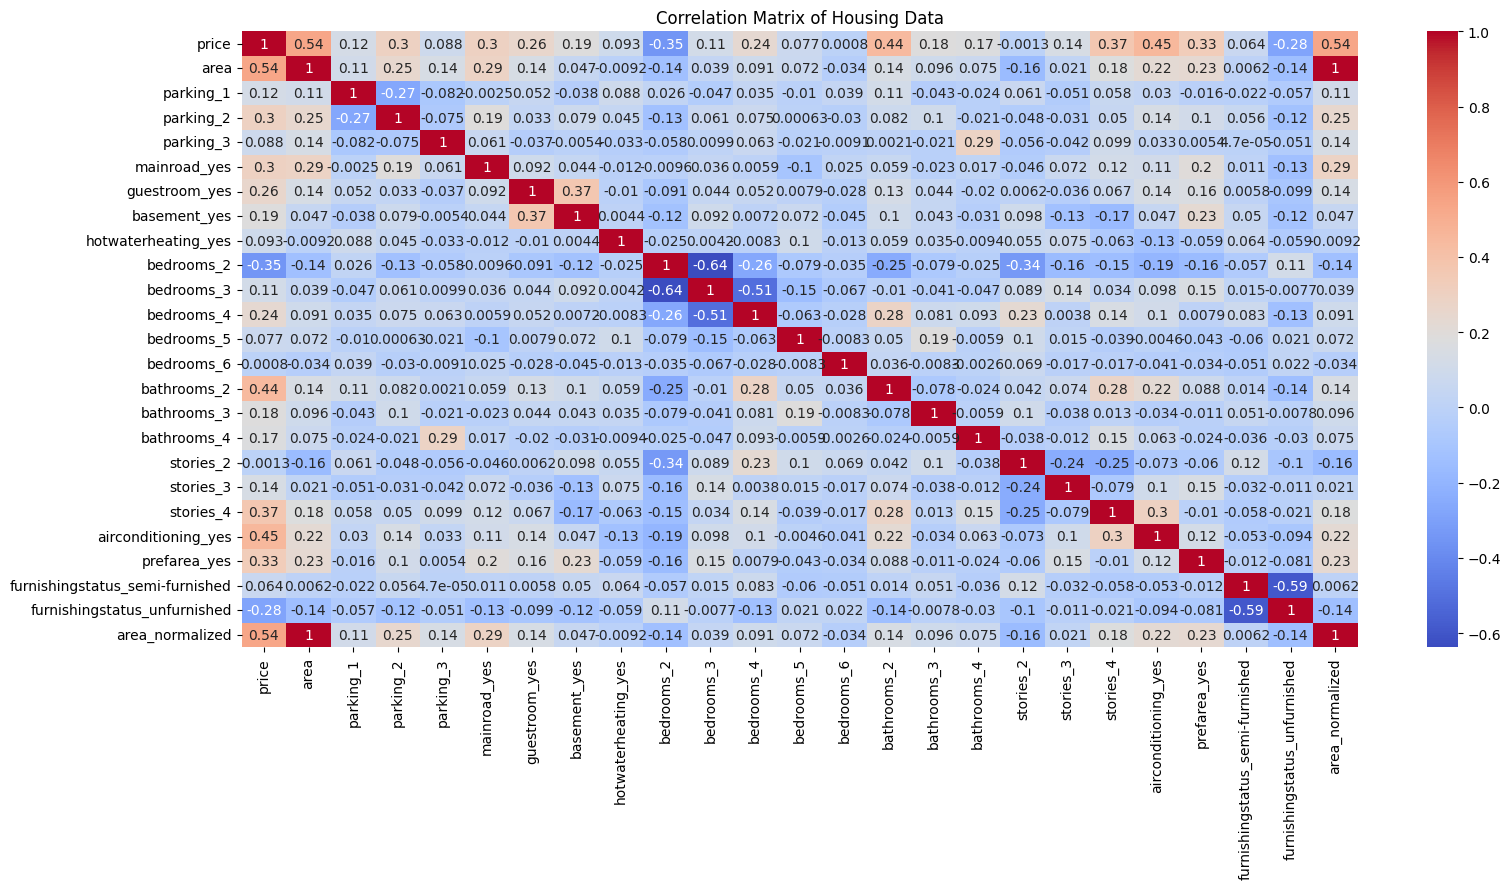

In [ ]:
#correlation matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(18, 8))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Housing Data')
plt.show()

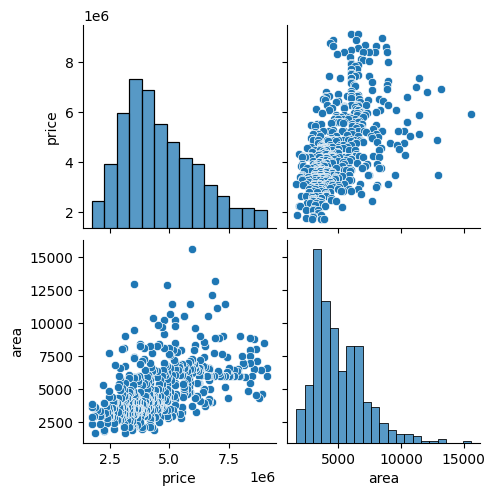

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns you want to include in the pairplot
columns_for_pairplot = ['price', 'area']

# Create the pairplot
sns.pairplot(df[columns_for_pairplot])
plt.show()

In [19]:
#import the necessary libraries
from sklearn.model_selection import train_test_split #Used to split the data into training and testing sets.
from sklearn.linear_model import LinearRegression   #The class for creating a linear regression model.
from sklearn.metrics import mean_squared_error, r2_score #Metrics for evaluating the model's performance.

#Prepare the Data:
X = df.drop('price', axis=1) #Contains all the features (independent variables) except the target variable ('price'). We drop the 'price' column using drop() and axis=1 to indicate we're dropping a column.
y = df['price'] #Contains the target variable ('price') that we want to predict.

#Split Data into Training and Testing Sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create and Train the Model:
model = LinearRegression()
model.fit(X_train, y_train)

#Make Predictions:
y_pred = model.predict(X_test)

#Evaluate the Model:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1114941416272.5176
R-squared: 0.6780064106947274


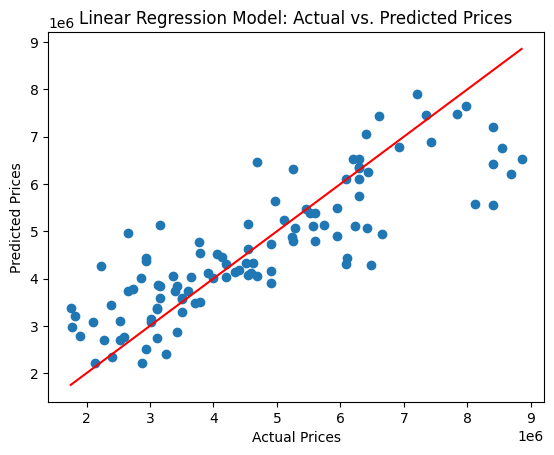

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression Model: Actual vs. Predicted Prices")
plt.show()

In [20]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     39.24
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           8.88e-86
Time:                        04:54:38   Log-Likelihood:                -6393.2
No. Observations:                 424   AIC:                         1.283e+04
Df Residuals:                     401   BIC:                         1.293e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
vif.sort_values(by="VIF Factor", ascending=False)

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,VIF Factor,features
9,11.905930,bedrooms_3
0,9.390793,area
4,8.331022,mainroad_yes
8,5.107648,bedrooms_2
10,5.084662,bedrooms_4
16,3.119659,stories_2
21,2.874903,furnishingstatus_semi-furnished
22,2.463653,furnishingstatus_unfurnished
6,1.962859,basement_yes
19,1.753131,airconditioning_yes


In [22]:
X_train=X_train.drop(['bedrooms_3'],axis=1)

In [26]:
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     41.12
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           1.80e-86
Time:                        04:59:32   Log-Likelihood:                -6393.5
No. Observations:                 424   AIC:                         1.283e+04
Df Residuals:                     402   BIC:                         1.292e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
vif.sort_values(by="VIF Factor", ascending=False)

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,VIF Factor,features
4,7.230935,mainroad_yes
0,7.130303,area
15,2.547702,stories_2
20,2.343169,furnishingstatus_semi-furnished
6,1.890730,basement_yes
21,1.863999,furnishingstatus_unfurnished
8,1.775641,bedrooms_2
18,1.740219,airconditioning_yes
12,1.685993,bathrooms_2
1,1.647911,parking_1


In [28]:
X_train=X_train.drop(['mainroad_yes'],axis=1)

In [29]:
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     41.57
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           5.98e-85
Time:                        05:00:42   Log-Likelihood:                -6399.3
No. Observations:                 424   AIC:                         1.284e+04
Df Residuals:                     403   BIC:                         1.293e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
vif.sort_values(by="VIF Factor", ascending=False)

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,VIF Factor,features
0,5.471268,area
19,2.305365,furnishingstatus_semi-furnished
14,2.297624,stories_2
5,1.869698,basement_yes
20,1.834189,furnishingstatus_unfurnished
17,1.735685,airconditioning_yes
11,1.684087,bathrooms_2
1,1.644230,parking_1
7,1.585115,bedrooms_2
16,1.537784,stories_4


In [31]:
X_train=X_train.drop(['furnishingstatus_semi-furnished'],axis=1)

In [32]:
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     43.85
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           9.32e-86
Time:                        05:02:18   Log-Likelihood:                -6399.4
No. Observations:                 424   AIC:                         1.284e+04
Df Residuals:                     404   BIC:                         1.292e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
vif.sort_values(by="VIF Factor", ascending=False)

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,VIF Factor,features
0,4.902140,area
14,2.061419,stories_2
5,1.860005,basement_yes
17,1.722252,airconditioning_yes
11,1.683983,bathrooms_2
1,1.632240,parking_1
16,1.532449,stories_4
8,1.525810,bedrooms_4
2,1.508131,parking_2
18,1.505603,prefarea_yes


In [34]:
X_train=X_train.drop(['stories_2'],axis=1)

In [35]:
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     46.32
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           1.74e-86
Time:                        05:09:07   Log-Likelihood:                -6399.7
No. Observations:                 424   AIC:                         1.284e+04
Df Residuals:                     405   BIC:                         1.291e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
vif.sort_values(by="VIF Factor", ascending=False)

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,VIF Factor,features
0,4.568313,area
5,1.846297,basement_yes
16,1.709429,airconditioning_yes
11,1.675406,bathrooms_2
1,1.615760,parking_1
2,1.508077,parking_2
17,1.505299,prefarea_yes
4,1.477397,guestroom_yes
7,1.419763,bedrooms_2
8,1.408699,bedrooms_4


In [37]:
X_train=X_train.drop(['bedrooms_6'],axis=1)

In [38]:
X_train=X_train.drop(['bedrooms_5'],axis=1)

In [39]:
X_train=X_train.drop(['parking_3'],axis=1)

In [40]:
X_train=X_train.drop(['bedrooms_4'],axis=1)

In [41]:
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     59.21
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           4.53e-89
Time:                        05:27:21   Log-Likelihood:                -6401.9
No. Observations:                 424   AIC:                         1.283e+04
Df Residuals:                     409   BIC:                         1.289e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
vif.sort_values(by="VIF Factor", ascending=False)

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,VIF Factor,features
0,4.132912,area
4,1.827605,basement_yes
12,1.703997,airconditioning_yes
1,1.582572,parking_1
7,1.534774,bathrooms_2
13,1.489783,prefarea_yes
2,1.483662,parking_2
3,1.471897,guestroom_yes
14,1.382945,furnishingstatus_unfurnished
6,1.364640,bedrooms_2


In [44]:
X_train=X_train.drop(['bathrooms_4'],axis=1)

In [45]:
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     59.21
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           4.53e-89
Time:                        05:31:29   Log-Likelihood:                -6401.9
No. Observations:                 424   AIC:                         1.283e+04
Df Residuals:                     409   BIC:                         1.289e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
vif.sort_values(by="VIF Factor", ascending=False)

,VIF Factor,features
0,4.132912,area
4,1.827605,basement_yes
11,1.703997,airconditioning_yes
1,1.582572,parking_1
7,1.534774,bathrooms_2
12,1.489783,prefarea_yes
2,1.483662,parking_2
3,1.471897,guestroom_yes
13,1.382945,furnishingstatus_unfurnished
6,1.364640,bedrooms_2


In [48]:
import matplotlib.pyplot as plt

# Predict the values using the trained model lr_2
y_pred = model.predict(sm.add_constant(X_test)) # Adding constant to X_test is important

plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression Model: Actual vs. Predicted Prices")
plt.show()

ValueError: shapes (106,24) and (15,) not aligned: 24 (dim 1) != 15 (dim 0)